### Netflix Viewing Data

In [30]:
import pandas as pd
%matplotlib inline
import matplotlib
import seaborn as sns


In [31]:
name = input("Type in your Netflix profile name")

Type in your Netflix profile nameSarang


In [32]:
all_accounts = pd.read_csv('ViewingActivity.csv', encoding = 'unicode_escape')
df = all_accounts[all_accounts['Profile Name'] == name]
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Bookmark', 'Latest Bookmark','Device Type', 'Country'], axis=1)


In [33]:
print('Data start date (first tv show/movie watched): ' + str(df['Start Time'].min()) )
print('Data end date is: ' + str(df['Start Time'].max()))

Data start date (first tv show/movie watched): 2018-11-14 00:44:49
Data end date is: 2020-12-14 08:19:10


In [34]:
df.dtypes
df['Start Time']= pd.to_datetime(df['Start Time'],utc=True)


In [35]:
print('Number of days data collected for: ' + str(df['Start Time'].max() - df['Start Time'].min()))

Number of days data collected for: 761 days 07:34:21


In [36]:
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Mountain')
# reset the index so that Start Time becomes a column again
df = df.reset_index()


In [37]:
df.dtypes

Start Time    datetime64[ns, US/Mountain]
Duration                           object
Title                              object
dtype: object

In [38]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes



Start Time    datetime64[ns, US/Mountain]
Duration                  timedelta64[ns]
Title                              object
dtype: object

In [39]:
#Remove any entries less than 1 minute in watchtime.. gets rid of previews and trailers
df = df[(df['Duration'] > '0 days 00:01:00')]


<AxesSubplot:title={'center':"Sarang's Account - Total View Count (Top 20)"}, xlabel='*View Count registers everytime user clicks on media and views >1min', ylabel='View Count'>

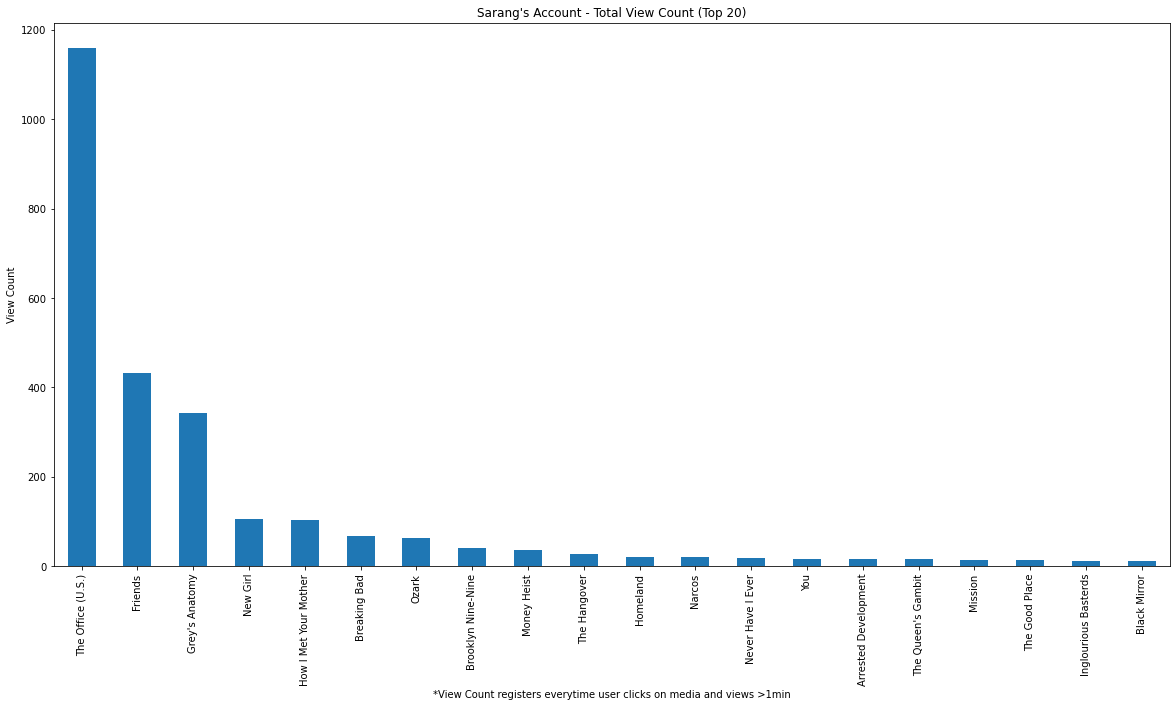

In [41]:
#Create new column with name of just the TV show or movie, not the defaulted "TV show + Season + Episode"
#TV Shows have a ':' delimiter to separate ShowName/Season/Episode, so code creates new df with Title and adds first column to the original df
new =df['Title'].str.split(":",expand=True)
df['Show/Movie Name'] = new[0]
shows_list = df['Show/Movie Name'].value_counts().nlargest(20)
shows_list
shows_list.plot(kind='bar', figsize=(20,10), ylabel = 'View Count',title= name+'\'s Account - Total View Count (Top 20)',xlabel = '*View Count registers everytime user clicks on media and views >1min')



In [42]:
# create a new dataframe called office that that takes from df
# only the rows in which the Title column contains 'The Office (U.S.)'
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]
office.Duration.sum()

Timedelta('10 days 17:02:59')

In [43]:
#Determine total viewtime between all accounts 

all_accounts['Duration'] = pd.to_timedelta(all_accounts['Duration'])
all_accounts = all_accounts[(all_accounts['Duration'] > '0 days 00:01:00')]
account_Runtime = all_accounts.groupby(['Profile Name']).Duration.sum().sort_values(ascending=False)
account_Runtime = pd.DataFrame(data=account_Runtime)
account_Runtime
#account_Runtime.plot(kind='pie', figsize=(20,10), title='Netflix View Count by Day')

,Duration
Profile Name,
Sarang,42 days 10:22:41
K,0 days 05:08:08


In [44]:
media_Runtime = df.groupby(['Show/Movie Name']).Duration.sum().sort_values(ascending=False).nlargest(20)
media_Runtime
pd.DataFrame(data=media_Runtime) 

,Duration
Show/Movie Name,
The Office (U.S.),10 days 17:02:59
Grey's Anatomy,6 days 14:42:55
Friends,3 days 15:21:51
Ozark,1 days 07:24:13
New Girl,0 days 23:05:07
How I Met Your Mother,0 days 19:45:54
Breaking Bad,0 days 17:16:57
Money Heist,0 days 16:37:21
The Hangover,0 days 13:07:44


<AxesSubplot:title={'center':"Sarang's Account - View Count by Day of Week"}, ylabel='View Count'>

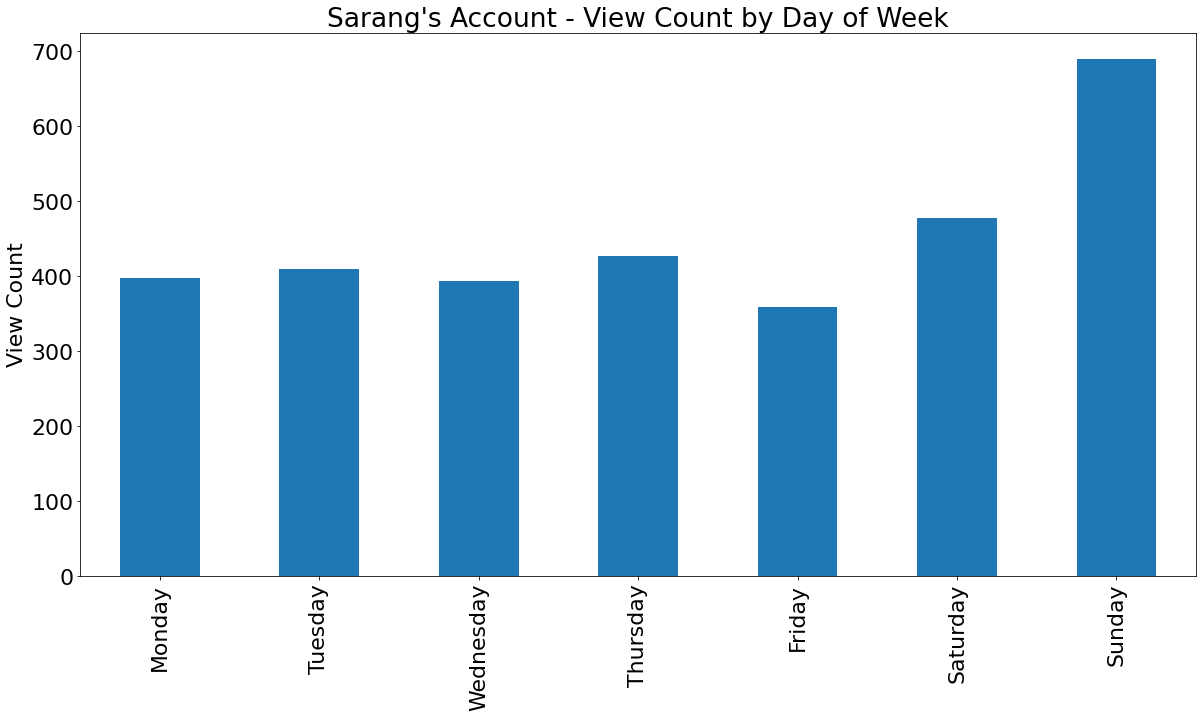

In [45]:
# set our categorical and define the order so the days are plotted Monday-Sunday
df['weekday'] = df['Start Time'].dt.weekday

df['weekday'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)

df['weekday'] = pd.Categorical(df['weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
df_by_day = df['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
df_by_day = df_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
df_by_day.plot(kind='bar', figsize=(20,10), title= name+'\'s Account - View Count by Day of Week', ylabel = "View Count")


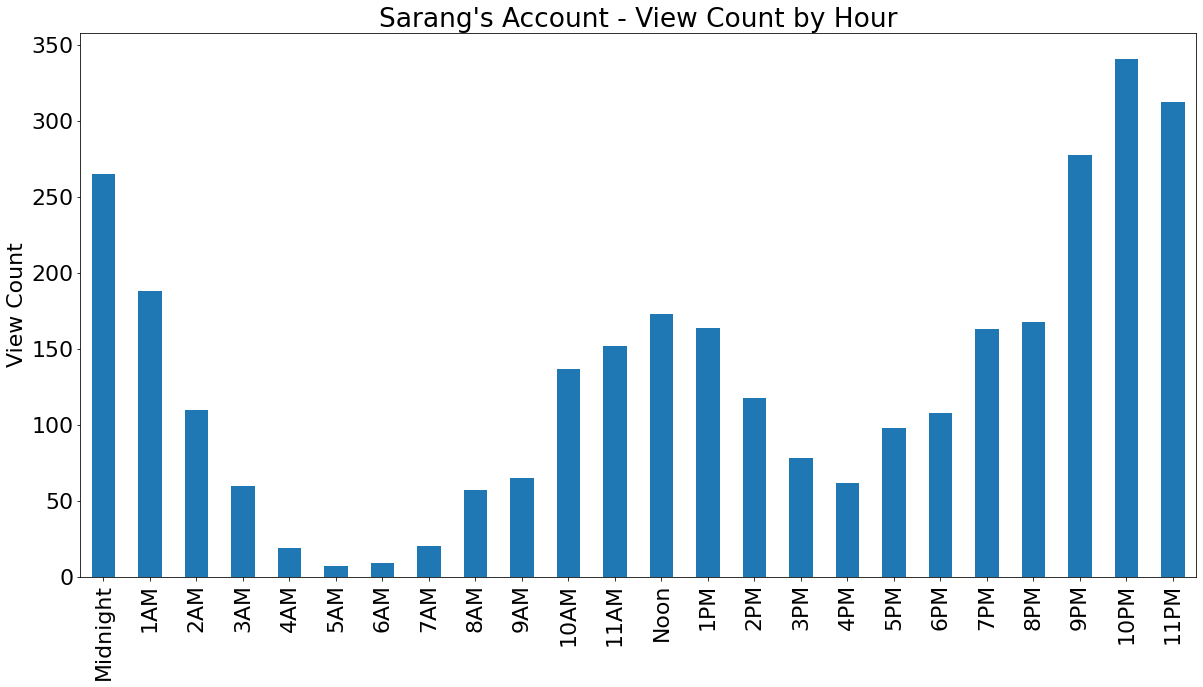

In [46]:
df['hour'] = df['Start Time'].dt.hour
df['hour'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['Midnight','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','Noon','1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM','10PM','11PM'],inplace=True)
# set our categorical and define the order so the hours are plotted 0-23
df['hour'] = pd.Categorical(df['hour'], categories=
    ['Midnight','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','Noon','1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM','10PM','11PM'],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable
df_by_hour = df['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
df_by_hour = df_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title
ax1=df_by_hour.plot(kind='bar', figsize=(20,10), title=name+'\'s Account - View Count by Hour', ylabel = "View Count")


In [47]:
#ax = sns.countplot(x='hour', data=df)